Hola **José**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler

In [199]:
data = pd.read_csv('/datasets/taxi.csv', index_col = [0], parse_dates=[0])

data.sort_index(inplace=True)
data = data.resample('1H').sum()

In [200]:
display(data.sample(10))
print()
data.info()

,num_orders
datetime,
2018-05-29 04:00:00,40
2018-07-25 07:00:00,60
2018-07-22 08:00:00,55
2018-08-16 03:00:00,166
2018-05-16 05:00:00,14
2018-06-12 13:00:00,73
2018-08-09 15:00:00,80
2018-03-18 00:00:00,70
2018-08-03 20:00:00,87



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [201]:
nulos = data['num_orders'].isna().sum()
total = len(data['num_orders'])
porcentaje_nulos = (nulos/total)*100

print(f'Valores nulos: {nulos}')
print(f'Porcentaje de nulos: {porcentaje_nulos}%')

Valores nulos: 0
Porcentaje de nulos: 0.0%


In [202]:
duplicados = data.duplicated().sum()
print(duplicados)

4165


## Análisis

       num_orders
count     4416.00
mean        84.42
std         45.02
min          0.00
25%         54.00
50%         78.00
75%        107.00
max        462.00
--------------------------------------------------
Periodo de 2018-03-01 00:00:00 a 2018-08-31 23:00:00
--------------------------------------------------
Total de horas: 4416
--------------------------------------------------
Promedio de pedidos: 84.42
--------------------------------------------------


<Figure size 1500x600 with 0 Axes>

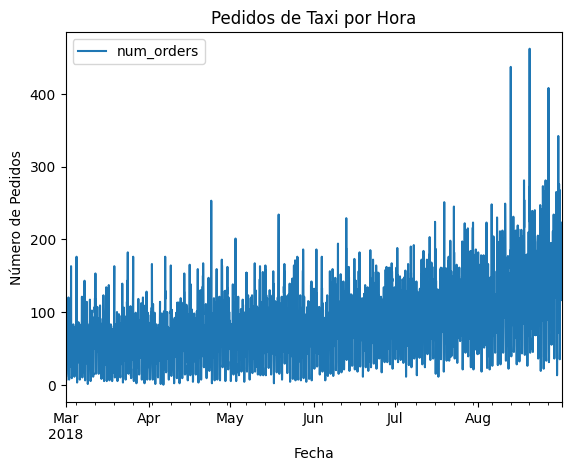

In [203]:
print(data.describe().round(2))
print('-'*50)
print(f'Periodo de {data.index.min()} a {data.index.max()}')
print('-'*50)
print(f'Total de horas: {len(data)}')
print('-'*50)
print(f'Promedio de pedidos: {data["num_orders"].mean():.2f}')
print('-'*50)

data = data.resample('1H').sum()

plt.figure(figsize=(15, 6))  # Ancho x Alto

data.plot()
plt.title('Pedidos de Taxi por Hora')
plt.xlabel('Fecha')
plt.ylabel('Número de Pedidos')

plt.show()

In [204]:
# data -= data.shift()
data['mean'] = data['num_orders'].rolling(10).mean()
data['std'] = data['num_orders'].rolling(10).std()

<Figure size 1500x600 with 0 Axes>

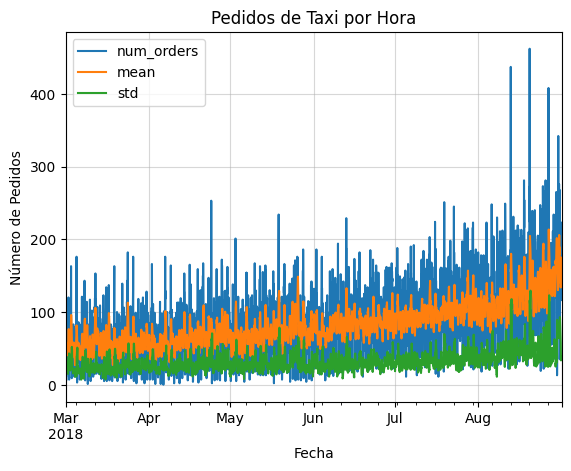

In [205]:
plt.figure(figsize=(15, 6))  # Ancho x Alto

data.plot()
plt.grid(alpha=0.5)
plt.title('Pedidos de Taxi por Hora')
plt.xlabel('Fecha')
plt.ylabel('Número de Pedidos')

plt.show()


### Interpretacion



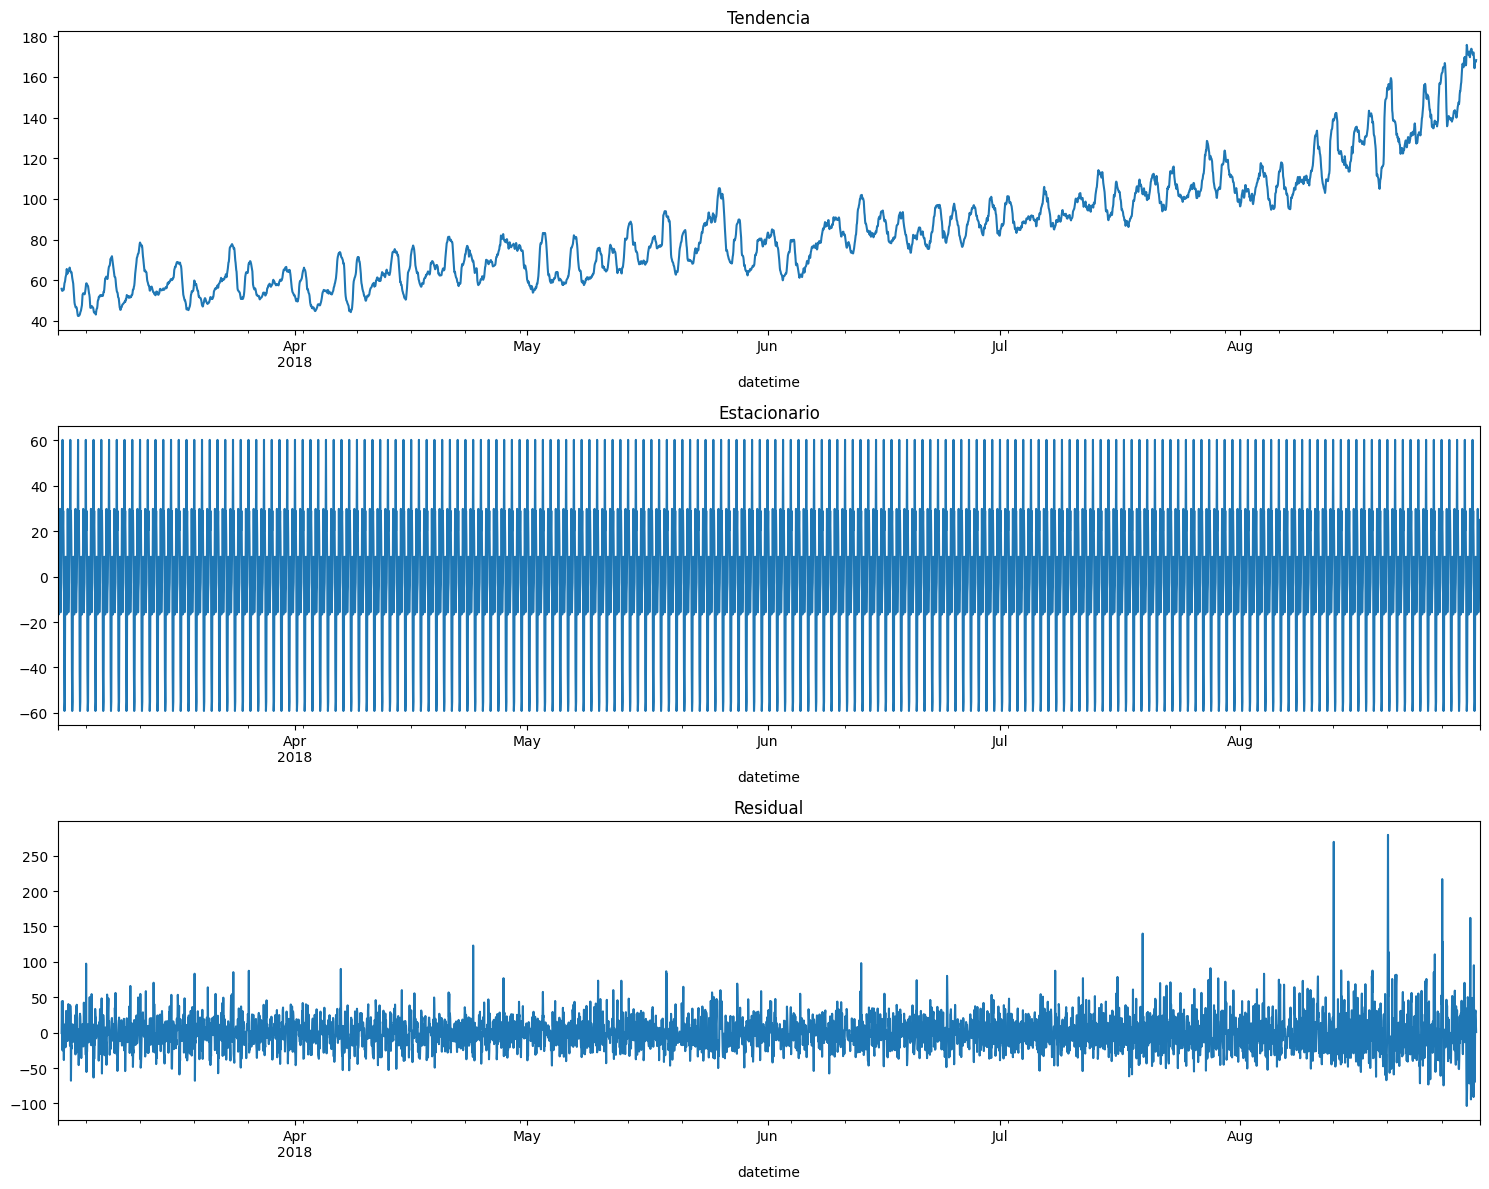

In [206]:
# Se ha presentado un valor ausente, por lo que haremos el tratamiento nuevamente para
# que al proceso de 'decomposed' se lleve acabo ya que no maneja valores ausentes

data = data.dropna()

decomposed = seasonal_decompose(data['num_orders'])

plt.figure(figsize=(15,12))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Tendencia')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Estacionario')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residual')

plt.tight_layout()

### Interpretacion




In [207]:

# Analisis del componente estacionario por mes

marzo = data['2018-03-01' : '2018-03-31']
abril = data['2018-04-01' : '2018-04-30']
mayo = data['2018-05-01' : '2018-05-31']
junio = data['2018-06-01' : '2018-06-30']
julio = data['2018-07-01' : '2018-07-31']
agosto = data['2018-08-01' : '2018-08-31']

componente_mar = seasonal_decompose(marzo['num_orders'])
componente_abr = seasonal_decompose(abril['num_orders'])
componente_may = seasonal_decompose(mayo['num_orders'])
componente_jun = seasonal_decompose(junio['num_orders'])
componente_jul = seasonal_decompose(julio['num_orders'])
componente_ago = seasonal_decompose(agosto['num_orders'])


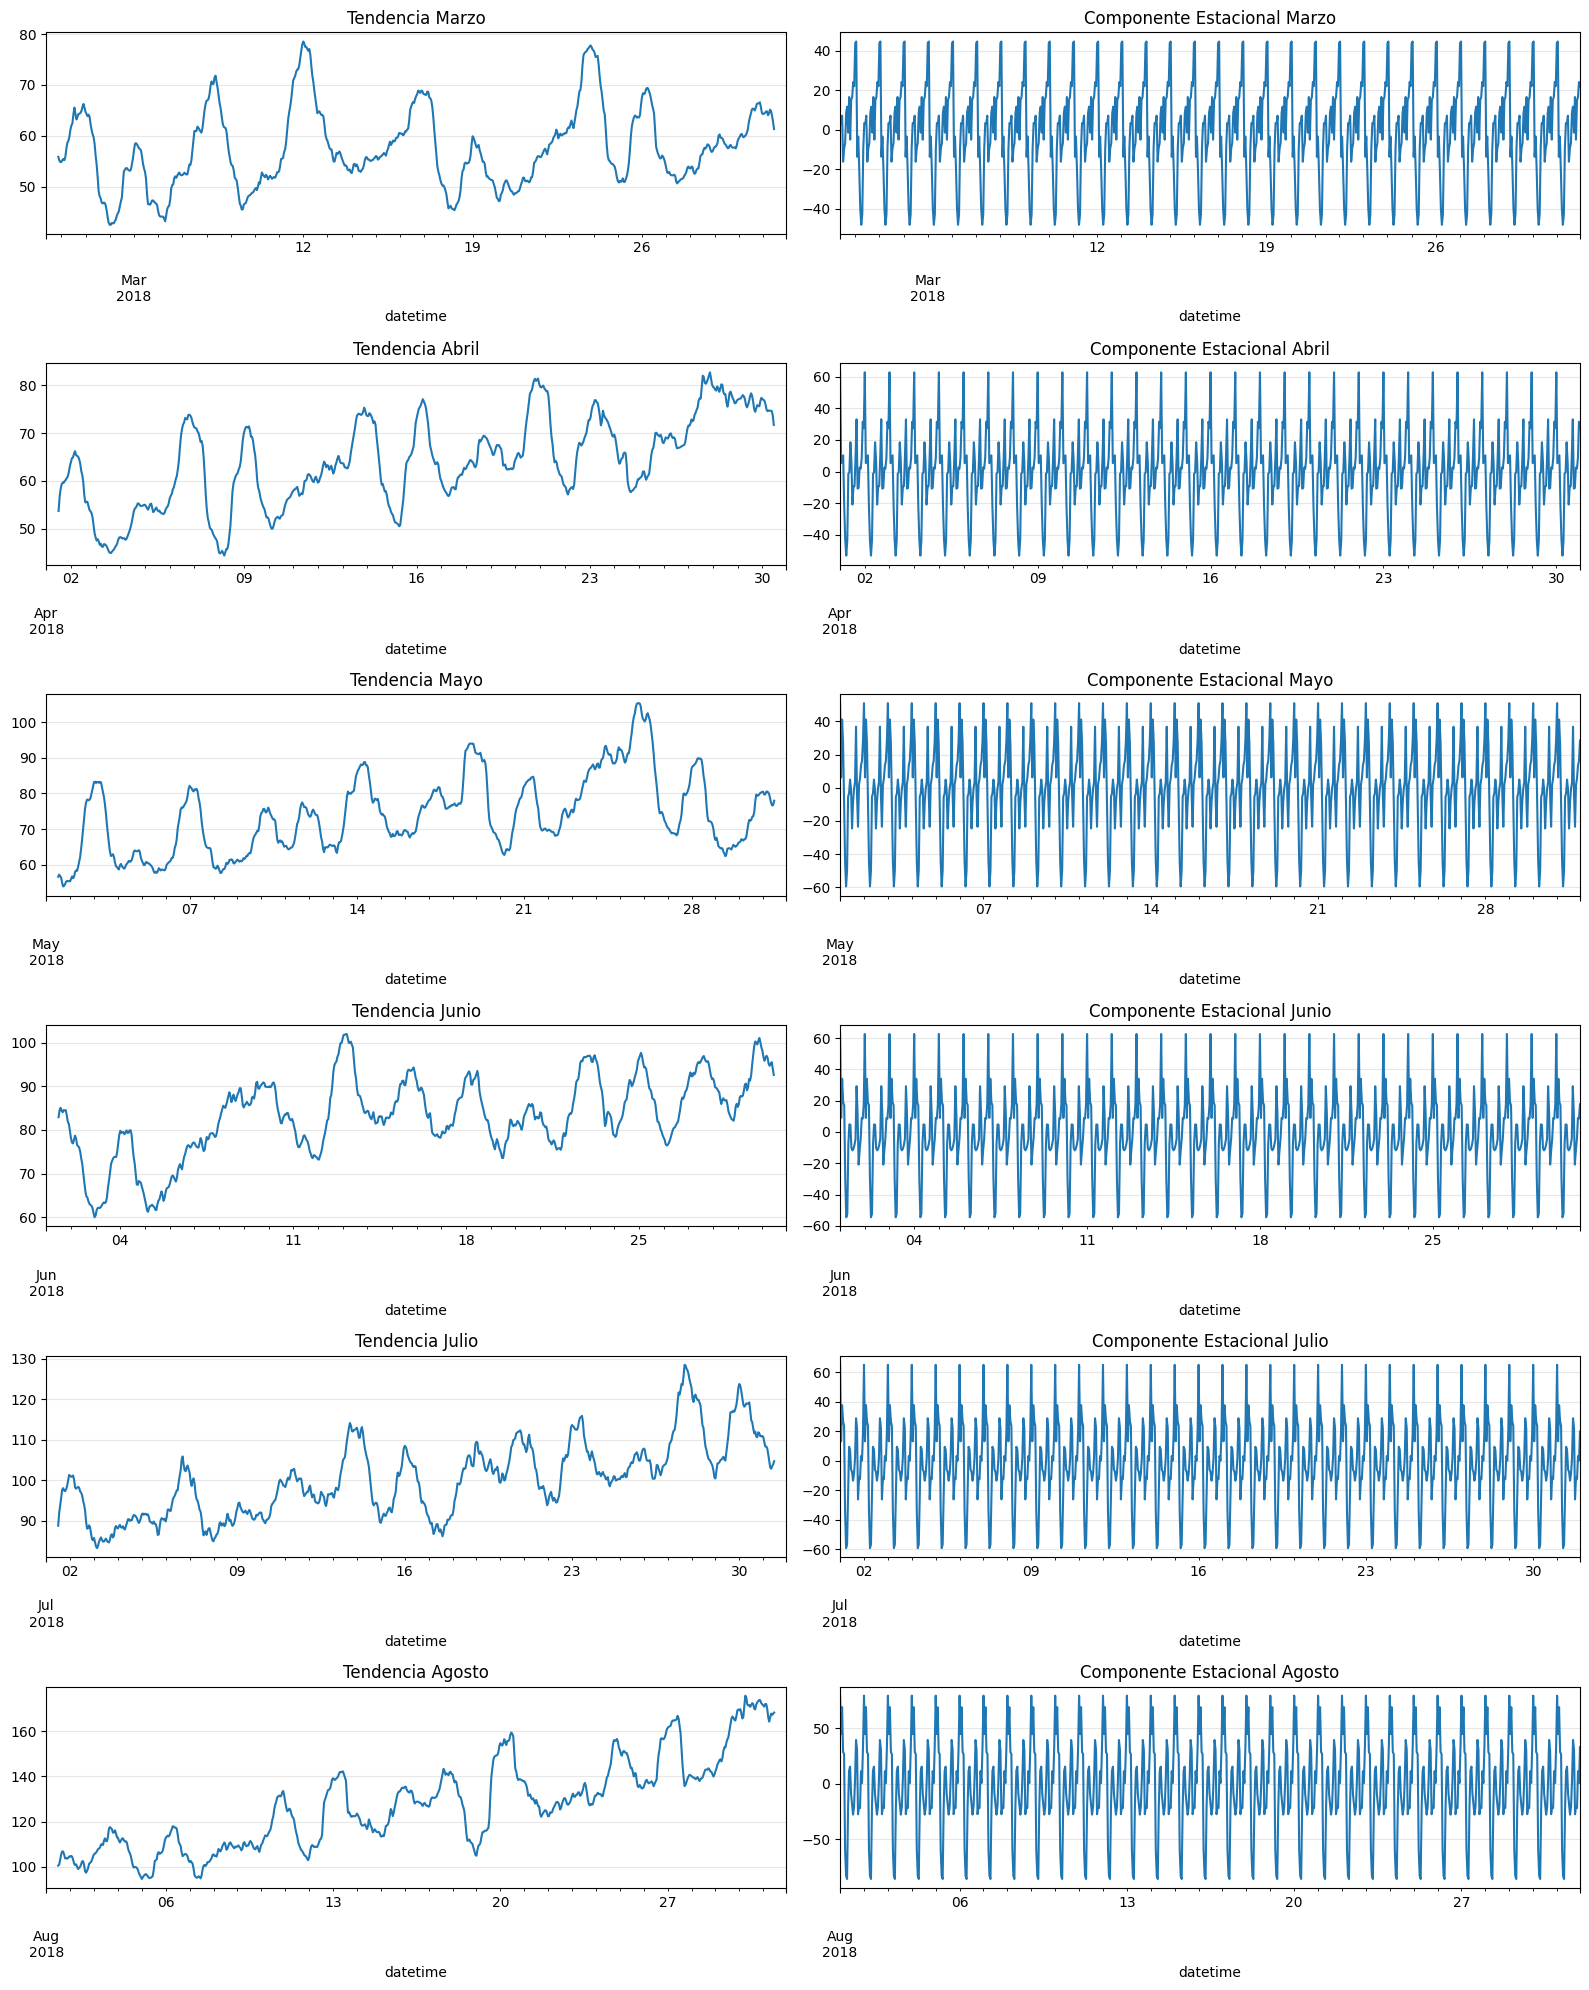

In [208]:

componentes = {
    'Marzo': componente_mar,
    'Abril': componente_abr, 
    'Mayo': componente_may,
    'Junio': componente_jun,
    'Julio': componente_jul,
    'Agosto': componente_ago
}

fig, axes = plt.subplots(6, 2, figsize=(16, 20))

for i, (mes, componente) in enumerate(componentes.items()):
    # Columna Trend
    componente.trend.plot(ax=axes[i, 0])
    axes[i, 0].set_title(f'Tendencia {mes}')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Columna Seasonal
    componente.seasonal.plot(ax=axes[i, 1])
    axes[i, 1].set_title(f'Componente Estacional {mes}')
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.show()


La demanda horaria de taxis está dominada por un ciclo diario muy repetitivo, mientras que la tendencia muestra un crecimiento gradual mes a mes, especialmente marcado en julio y agosto. Los modelos deben capturar principalmente la estacionalidad diaria, mientras que la tendencia ascendente explica por qué los valores de agosto son más altos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizadas las gráficas para analizar los datos considerando el tipo de problema a resolver, que en este caso es serie de tiempo
</div>

## Formación

In [209]:
# Se crean los features temporales que nos serviran para mejorar la evaluacion de los modelos, 
# ya que contamos con poca informacion y no seria suficiente para tener resultados mas certeros

def make_features(data, max_lag, rolling_mean_size):
    data['mes'] = data['num_orders'].index.month
    data['dia_de_la_semana'] = data['num_orders'].index.dayofweek
    data['fin_de_semana'] =  data['dia_de_la_semana'].isin([5, 6]).astype(int)

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_24_mean'] = data['num_orders'].shift(1).rolling(window=24).mean()
    data['rolling_168_mean'] = data['num_orders'].shift(1).rolling(window=168).mean()
    
make_features(data, 6, 10)

In [210]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4239 entries, 2018-03-08 09:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   num_orders        4239 non-null   int64  
 1   mean              4239 non-null   float64
 2   std               4239 non-null   float64
 3   mes               4239 non-null   int64  
 4   dia_de_la_semana  4239 non-null   int64  
 5   fin_de_semana     4239 non-null   int64  
 6   lag_1             4239 non-null   float64
 7   lag_2             4239 non-null   float64
 8   lag_3             4239 non-null   float64
 9   lag_4             4239 non-null   float64
 10  lag_5             4239 non-null   float64
 11  lag_6             4239 non-null   float64
 12  rolling_24_mean   4239 non-null   float64
 13  rolling_168_mean  4239 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 496.8 KB


In [211]:
target = data['num_orders']
features = data.drop(['num_orders'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle=False, test_size= 0.10)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, realizaste los ajustes de las características en el dataset de manera adecuada para obtener un buen desempeño en los entrenamientos
    
</div>

In [212]:

def evaluar_modelo(nombre, modelo, X_train, y_train, X_test, y_test):

    modelo.fit(X_train, y_train)


    pred_train = modelo.predict(X_train)
    pred_test = modelo.predict(X_test)

    rmse_train = mean_squared_error(y_train, pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, pred_test, squared=False)

    print(f'=== {nombre} ===')
    print(f'RMSE train: {rmse_train:.2f}')
    print(f'RMSE test: {rmse_test:.2f}')
    print()

    return {
        'modelo': nombre,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test
    }


## Prueba

In [213]:
resultados = []

In [214]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regresion Lineal

In [215]:
linear_regression = LinearRegression()
resultado_lin = evaluar_modelo('Linear Regression', linear_regression, X_train_scaled, y_train, X_test_scaled, y_test)
resultados.append(resultado_lin)

=== Linear Regression ===
RMSE train: 28.03
RMSE test: 45.68



### Arbol de Decision

In [216]:
mejor_rmse_tree = float('inf')
mejor_params_tree = None

for max_depth in [5,10,20, None]:
    tree = DecisionTreeRegressor(
        random_state = 12345, 
        max_depth = max_depth
    )
    nombre = f'Arbol de Decision (max_depth = {max_depth})'
    
    resultado_tree = evaluar_modelo(
        nombre, 
        tree, 
        X_train,
        y_train,
        X_test,
        y_test
    )
    resultados.append(resultado_tree)

    if resultado_tree['rmse_test'] < mejor_rmse_tree:
        mejor_rmse_tree = resultado_tree['rmse_test']
        mejor_params_tree = {'max_depth': max_depth}

print(f'Mejor Arbol: {mejor_params_tree}, RECM test: {mejor_rmse_tree}')
print()

=== Arbol de Decision (max_depth = 5) ===
RMSE train: 27.31
RMSE test: 56.36

=== Arbol de Decision (max_depth = 10) ===
RMSE train: 17.93
RMSE test: 63.53

=== Arbol de Decision (max_depth = 20) ===
RMSE train: 1.91
RMSE test: 68.59

=== Arbol de Decision (max_depth = None) ===
RMSE train: 0.00
RMSE test: 68.56

Mejor Arbol: {'max_depth': 5}, RECM test: 56.35694150321272



<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Ten cuidado con estos casos donde la métrica de evaluación es súper bajo en entrenamiento pero algo en pruebas ya que esto indica un sobre-ajuste y habría que reducir la complejidad de los modelos utilizados o aplicar alguna técnica adicional para mitigar este efecto
</div>

### Bosque Aleatorio

In [217]:
mejor_rmse_rf = float('inf')
mejor_params_rf = None

for est in [100,300]:
    for max_depth in [5,10, None]:
        rf = RandomForestRegressor(
            random_state = 12345, 
            max_depth = max_depth, 
            n_estimators = est,
            n_jobs = -1
        )
        nombre = f'Bosque Aleatorio (n_estimators = {est} | depth = {max_depth})'
        
        resultado_rf = evaluar_modelo(
            nombre, 
            rf,
            X_train,
            y_train,
            X_test,
            y_test
        )
        resultados.append(resultado_rf)
    
        if resultado_rf['rmse_test'] < mejor_rmse_rf:
            mejor_rmse_rf = resultado_rf['rmse_test']
            mejor_params_rf = {'n_estimators':est, 'max_depth': max_depth}

print(f'Mejor Bosque Aleatorio: {mejor_params_rf}, RECM test: {mejor_rmse_rf}')
print()

=== Bosque Aleatorio (n_estimators = 100 | depth = 5) ===
RMSE train: 25.88
RMSE test: 56.30

=== Bosque Aleatorio (n_estimators = 100 | depth = 10) ===
RMSE train: 16.49
RMSE test: 52.89

=== Bosque Aleatorio (n_estimators = 100 | depth = None) ===
RMSE train: 9.40
RMSE test: 53.22

=== Bosque Aleatorio (n_estimators = 300 | depth = 5) ===
RMSE train: 25.83
RMSE test: 56.01

=== Bosque Aleatorio (n_estimators = 300 | depth = 10) ===
RMSE train: 16.30
RMSE test: 52.68

=== Bosque Aleatorio (n_estimators = 300 | depth = None) ===
RMSE train: 9.23
RMSE test: 52.80

Mejor Bosque Aleatorio: {'n_estimators': 300, 'max_depth': 10}, RECM test: 52.67987179630284



### LihtGBM

In [220]:

mejor_rmse_lgbm = float('inf')
mejor_params_lgbm = None

for num_leaves in [30, 60]:
    for learning_rate in [0.1, 0.01]:
        lgbm = LGBMRegressor(
            random_state = 12345, 
            n_estimators = 200, 
            num_leaves = num_leaves, 
            learning_rate = learning_rate,
            verbose = -1,
            n_jobs = -1
        )
        nombre = f'LightGBM (num_leaves = {num_leaves} | learning_rate = {learning_rate})'
        
        resultado_lgbm = evaluar_modelo(
            nombre, 
            lgbm, 
            X_train,
            y_train,
            X_test,
            y_test
        )
        resultados.append(resultado_lgbm)
    
        if resultado_lgbm['rmse_test'] < mejor_rmse_lgbm:
            mejor_rmse_lgbm = resultado_lgbm['rmse_test']
            mejor_params_lgbm = {'num_leaves':num_leaves, 'learning_rate': learning_rate}

print(f'Mejor LightGBM: {mejor_params_lgbm}, RECM test: {mejor_rmse_lgbm:.2f}')
print()

=== LightGBM (num_leaves = 20 | learning_rate = 0.05) ===
RMSE train: 17.18
RMSE test: 53.52

=== LightGBM (num_leaves = 20 | learning_rate = 0.03) ===
RMSE train: 19.62
RMSE test: 53.12

=== LightGBM (num_leaves = 20 | learning_rate = 0.01) ===
RMSE train: 24.69
RMSE test: 57.72

=== LightGBM (num_leaves = 40 | learning_rate = 0.05) ===
RMSE train: 13.06
RMSE test: 52.12

=== LightGBM (num_leaves = 40 | learning_rate = 0.03) ===
RMSE train: 15.91
RMSE test: 52.27

=== LightGBM (num_leaves = 40 | learning_rate = 0.01) ===
RMSE train: 22.19
RMSE test: 55.97

Mejor LightGBM: {'num_leaves': 40, 'learning_rate': 0.05}, RECM test: 52.12



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Lograste una métrica por debajo de lo requerido para este proyecto demostrando que el modelo pudo interpretar de manera adecuada tus datos para la predicción
</div>

In [219]:
res_df = pd.DataFrame(resultados)

# Ver qué columnas tiene
print(res_df.columns)

# Ordenar por rmse_test (de menor a mayor) y reiniciar índice
res_df_sorted = res_df.sort_values(by='rmse_test', ascending=True).reset_index(drop=True)

display(res_df_sorted.head(5).round(2))

Index(['modelo', 'rmse_train', 'rmse_test'], dtype='object')


,modelo,rmse_train,rmse_test
0,Linear Regression,28.03,45.68
1,LightGBM (num_leaves = 60 | learning_rate = 0.05),10.50,51.57
2,LightGBM (num_leaves = 60 | learning_rate = 0.1),6.33,52.56
3,Bosque Aleatorio (n_estimators = 300 | depth =...,16.30,52.68
4,Bosque Aleatorio (n_estimators = 300 | depth =...,9.23,52.80


De acuerdo a los resultados, el modelo de Regresion Lineal ha presentado un umbral menor al solicitado, presentando un error de 45.68.

# Implicaciones para el Modelado Predictivo

El análisis de la serie temporal muestra que los pedidos de taxi presentan una combinación de alta estacionalidad diaria y semanal, junto con una variabilidad considerable dentro de cada día. Esto implica que los modelos deben ser capaces de captar patrones repetitivos de corto plazo, así como fluctuaciones bruscas en la actividad.

Para ello, fue necesario construir features temporales específicas, como la hora del día, el día de la semana, rezagos (lags) y promedios móviles (rolling means). Estas características permiten que los modelos aprendan dependencias tanto inmediatas como recurrentes en la serie, y han demostrado ser adecuadas para capturar la estructura principal de los datos.

Sin embargo, la persistencia de un RMSE similar entre distintos modelos—incluyendo regresión lineal, bosques aleatorios y LightGBM—indica que existe un componente de ruido en la serie que no permite predecir con mas certeza. Este comportamiento puede deberse a factores externos (clima, tráfico, festivos, actividad aeroportuaria), que no están presentes en el dataset y podrian ayudar en la evaluacion de los modelos.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado José, aplicaste los procesos adecuados al dataset para darle características nuevas al modelo, con ese proceso aportas significativamente al desempeño del mismo y obtuviste una métrica que supera lo propuesto para este proyecto, continúa con este gran trabajo!
    
   
Este proyecto es uno donde se ve claramente la importancia de darle características o variables adecuadas a los modelos para obtener un correcto desempeño, si quitas o pones más variables el desempeño del modelo variará para bien o para mal según la calidad de las mismas. Saludos!
</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48